In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import os
import pandas as pd
from scipy.stats import linregress
import nibabel as nib
import urllib
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

The question: do we replicate Van Djik and Satterthwaite 2012 and show that mean fd correlates with roi -roi distance correaltions.

The graph I'm going to try to replicate has "correlation of motion and connectivity" on the y-axis and "inter-node euclidean distance (mm)" on the X axis. IT's from the Satterthwaite  paper. The slope is negative.

In [2]:
behav_data_f = '../../Phenotypic_V1_0b_preprocessed1.csv'
df = pd.read_csv(behav_data_f)

In [3]:
#get rid of people who have no filename or func_perc_fd

df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])


#threshold data by age
motion_thresh = 19
df = df.loc[df['func_perc_fd']<motion_thresh, :]

First we want to get roi-roi correlations across the whole sample (just kids!)

## Get data

Create average roi-roi correlation for whole data set!


In [4]:
for i, (sub, f_id) in enumerate(df[['SUB_ID', 'FILE_ID']].values):
    ts_df = pd.read_table('DATA/{}_rois_aal.1D'.format(f_id))

    #print ts_df.isnull().sum().sum()
    corr_mat_r = ts_df.corr()
    corr_mat=np.arctanh(corr_mat_r)
        
    if i == 0:
        all_corr_mat = np.zeros([corr_mat.shape[0], corr_mat.shape[1], len(df)])

    all_corr_mat[:, :, i] = corr_mat
        
    av_corr_mat = np.nanmean(all_corr_mat, axis=2)
    var_corr_mat = np.nanvar(all_corr_mat, axis=2)

In [5]:
#av_corr_mat
all_corr_mat[:, :, 1]

array([[        inf,  1.13598675,  1.11663265, ...,  0.75458203,
         0.62360378, -0.06880908],
       [ 1.13598675,         inf,  0.73216097, ...,  0.63816188,
         0.41774748, -0.16368248],
       [ 1.11663265,  0.73216097,         inf, ...,  0.75112739,
         0.64011772, -0.04968836],
       ..., 
       [ 0.75458203,  0.63816188,  0.75112739, ...,         inf,
         0.52549838,  0.25675198],
       [ 0.62360378,  0.41774748,  0.64011772, ...,  0.52549838,
                inf,  0.20396489],
       [-0.06880908, -0.16368248, -0.04968836, ...,  0.25675198,
         0.20396489,         inf]])

plot average correlation between rois

In [6]:
# add aal labels?
aal_labels = 'aal116.csv'
df = pd.read_csv(aal_labels )
#df.head()
labels =df.loc[:, 'name']


In [7]:
d = pd.DataFrame(data=av_corr_mat,
                 columns=labels)
d.head()

name,PreCG.L,PreCG.R,SFGdor.L,SFGdor.R,ORBsup.L,ORBsup.R,MFG.L,MFG.R,ORBmid.L,ORBmid.R,...,CB10.L,CB10.R,VERMIS1_2,VERMIS3,VERMIS4_5,VERMIS6,VERMIS7,VERMIS8,VERMIS9,VERMIS10
0,inf,0.930252,0.624571,0.445470,0.364656,0.247796,0.663808,0.438821,0.368661,0.258988,...,0.135630,0.087807,0.086879,0.153813,0.307616,0.380875,0.326666,0.242129,0.044719,0.032855
1,0.930252,inf,0.420528,0.574650,0.285633,0.267458,0.481890,0.615987,0.277096,0.333228,...,0.152592,0.080393,0.077516,0.144130,0.283998,0.412636,0.368185,0.259963,0.051538,0.039348
2,0.624571,0.420528,inf,0.754147,0.633853,0.417511,1.173463,0.725420,0.587371,0.382523,...,0.147243,0.102534,0.111699,0.150754,0.410123,0.321813,0.254032,0.242979,0.077752,0.043093
3,0.445470,0.574650,0.754147,inf,0.423355,0.563728,0.621849,1.024328,0.399681,0.526445,...,0.148842,0.084724,0.094071,0.136922,0.349192,0.325795,0.277076,0.276691,0.103008,0.039032
4,0.364656,0.285633,0.633853,0.423355,inf,0.553163,0.678011,0.487921,0.888294,0.610650,...,0.107781,0.062421,0.084314,0.106827,0.237077,0.234195,0.196223,0.175272,0.055018,0.032501


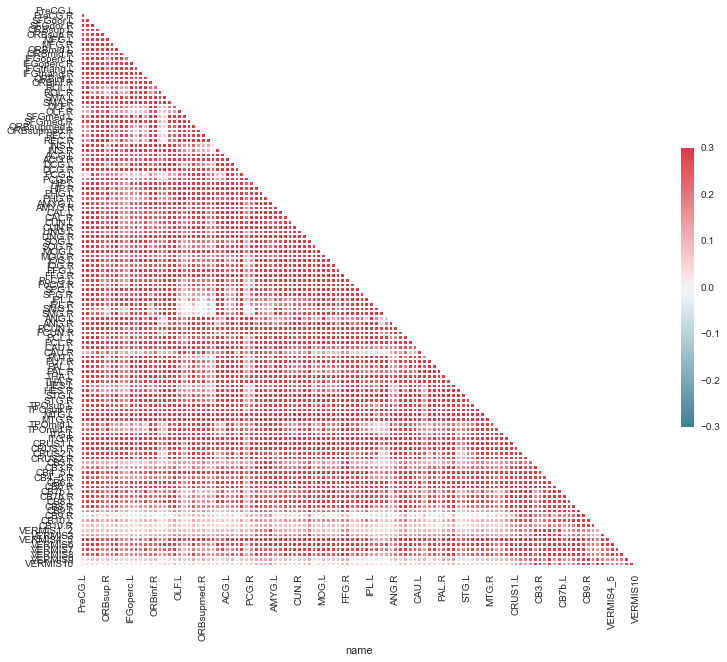

In [146]:
from string import letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=list(labels),
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


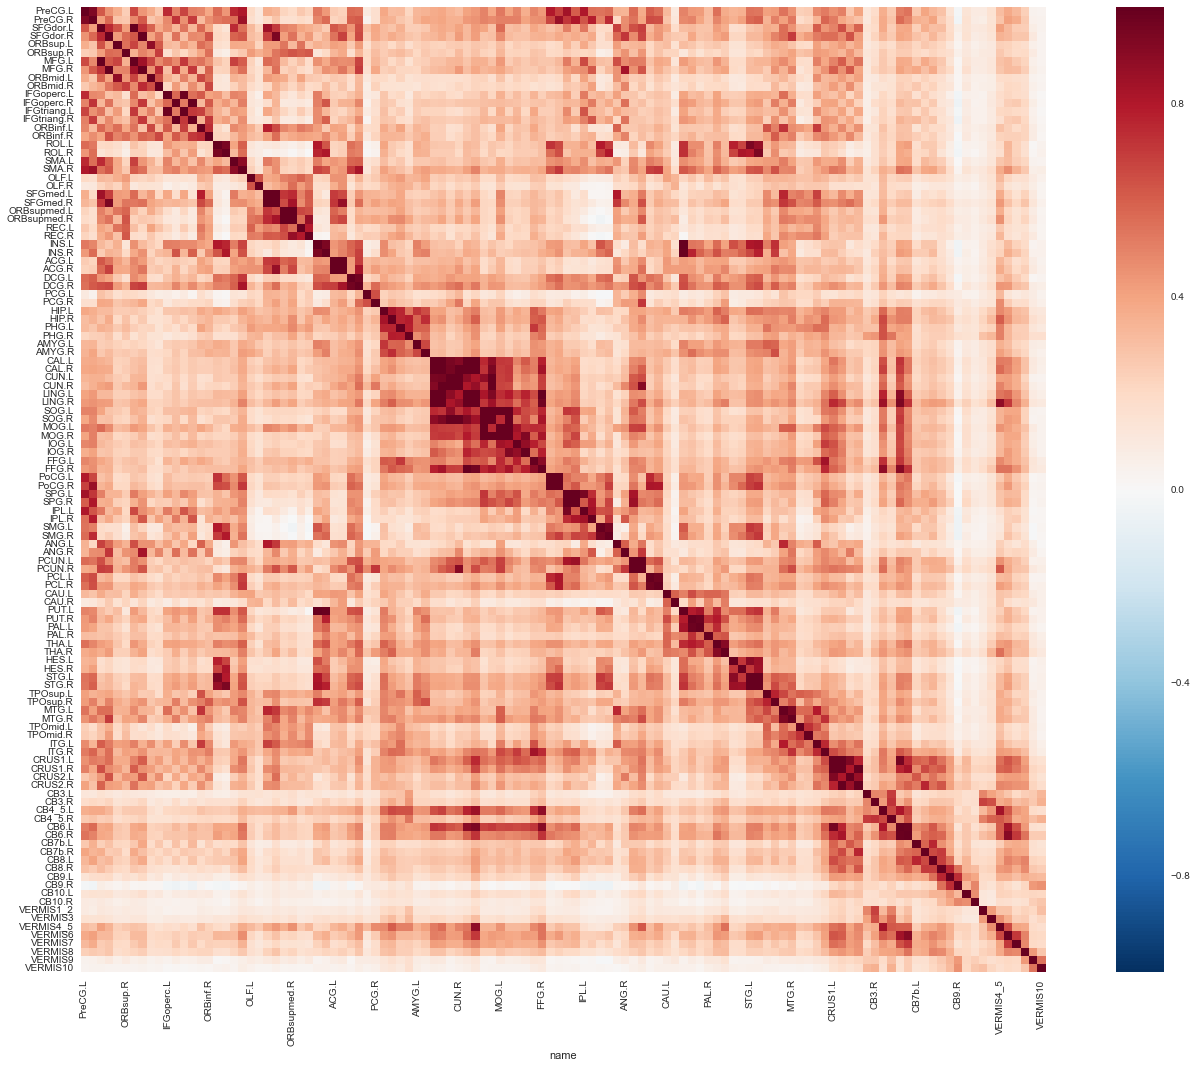

In [147]:

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap using seaborn
sns.heatmap(d, vmax=1, square=True,ax=ax,
             xticklabels=5, yticklabels=list(labels) )

f.tight_layout()

In [ ]:
inds = np.triu_indices_from(av_corr_mat, k=1)
x = av_corr_mat[inds]
sns.distplot(x)

For each subject we have roi-roi correlation matrix and one motion parameter. 

Then create 116x116 matrix of motion value per subject (in same 3d array)

Then correlate motion matrix with roi-roi matrix

put motion - roiroi matrixes into 1 line 


In [ ]:
(116*115)/2

In [9]:
all_corr_mat.shape


(116, 116, 798)

In [10]:
inds = np.triu_indices_from(all_corr_mat[:,:,1], k=1)
motion = all_corr_mat[inds]
motion

array([[ 0.82401977,  1.13598675,  1.45693434, ...,  1.22091522,
         1.44140163,  0.57503718],
       [ 0.48103058,  1.11663265,  0.63469214, ...,  1.17662765,
         1.46128204,  0.46679903],
       [ 0.25881922,  0.94488451,  0.3033127 , ...,  0.85553547,
         1.14130064, -0.07165921],
       ..., 
       [ 0.86684047,  0.52549838,  0.12172708, ...,  0.21434856,
         0.11116949,  0.13726444],
       [-0.06174073,  0.25675198,  0.19842275, ...,  0.30146729,
        -0.15261759,  0.17987051],
       [ 0.02718013,  0.20396489,  0.11455129, ...,  0.16544582,
         1.11827449,  0.0978969 ]])

In [50]:
behav_data_f = '../../Phenotypic_V1_0b_preprocessed1.csv'
df = pd.read_csv(behav_data_f)

In [53]:
#get rid of people who have no filename or func_perc_fd

df = df.loc[df['func_perc_fd'].notnull(), :]
df = df.loc[df['FILE_ID']!='no_filename', :]
df['AGE_YRS'] = np.floor(df['AGE_AT_SCAN'])


#threshold data by age
motion_thresh = 19
df = df.loc[df['func_perc_fd']<motion_thresh, :]

In [130]:
motion=df.loc[:, 'func_mean_fd']
motion_roi_corr =np.ones((116,116))
motion_roi_corr.shape


(116, 116)

In [110]:
corr_dat=pd.DataFrame(all_corr_mat[1,2,:])
corr_dat["motion"]=motion
corr_dat.corr()["motion"][0]


-0.058318586617240445

In [ ]:
motion_roi_corr[r,rn]=corr_dat.corr()

In [111]:
for  r in range(all_corr_mat.shape[0]):#range(0,avgwf.shape[1]):
            #r = int(r)
            for rn in range(all_corr_mat.shape[0]):
                #rn = int(rn)
                if rn != r:
                # arctanh = Fisher transform:
                    corr_dat=pd.DataFrame(all_corr_mat[r,rn,:])
                    corr_dat["motion"]=motion
                    motion_roi_corr[r,rn]=corr_dat.corr()["motion"][0]
                    #motion_roi_corr[r,rn] = np.arctanh(np.corrcoef(corr_dat,motion)[0,1]) 

In [112]:
motion_roi_corr

array([[ 1.        , -0.01897044, -0.03688186, ..., -0.07116379,
        -0.03403042,  0.02082919],
       [-0.01897044,  1.        , -0.05831859, ..., -0.0614401 ,
        -0.0200157 ,  0.0263602 ],
       [-0.03688186, -0.05831859,  1.        , ...,  0.01152452,
         0.00130535,  0.06073805],
       ..., 
       [-0.07116379, -0.0614401 ,  0.01152452, ...,  1.        ,
        -0.03293549, -0.04237878],
       [-0.03403042, -0.0200157 ,  0.00130535, ..., -0.03293549,
         1.        , -0.05160026],
       [ 0.02082919,  0.0263602 ,  0.06073805, ..., -0.04237878,
        -0.05160026,  1.        ]])

In [123]:
aal = 'dist_mat.csv'
aaldf = np.genfromtxt(aal,delimiter=",")
aaldf.shape

(116, 116)

In [125]:
inds = np.triu_indices_from(aaldf, k=1)
x = aaldf[inds]
x

array([ 80.06824464,  46.08543913,  71.21261756, ...,   9.59309064,
        18.79944893,   9.64043059])

In [126]:
inds = np.triu_indices_from(motion_roi_corr, k=1)
y = motion_roi_corr[inds]
y

array([-0.01897044, -0.03688186,  0.01696253, ..., -0.03293549,
       -0.04237878, -0.05160026])

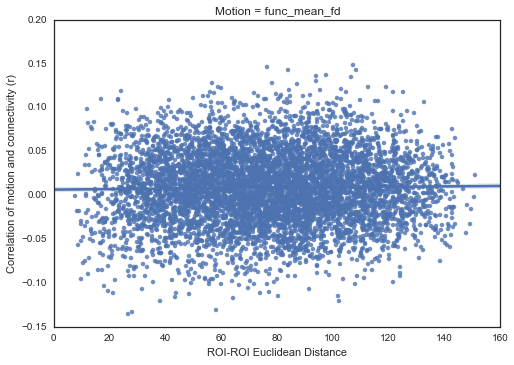

In [137]:
plot=sns.regplot(x,y)
plot.set(xlabel="ROI-ROI Euclidean Distance", ylabel = "Correlation of motion and connectivity (r)")
plot.set_title('Motion = func_mean_fd')
plt.show()

In [ ]:
np.corrcoef(x,y)

## Ok try func_perc_fd...

In [133]:
motion=df.loc[:, 'func_perc_fd']
motion_roi_corr =np.ones((116,116))
motion_roi_corr.shape


(116, 116)

In [140]:
for  r in range(all_corr_mat.shape[0]):#range(0,avgwf.shape[1]):
            #r = int(r)
            for rn in range(all_corr_mat.shape[0]):
                #rn = int(rn)
                if rn != r:
                # arctanh = Fisher transform:
                    corr_dat=pd.DataFrame(all_corr_mat[r,rn,:])
                    corr_dat["motion"]=motion
                    motion_roi_corr[r,rn]=corr_dat.corr()["motion"][0]

In [141]:
aal = 'dist_mat.csv'
aaldf = np.genfromtxt(aal,delimiter=",")
aaldf.shape

(116, 116)

In [142]:
inds = np.triu_indices_from(aaldf, k=1)
x = aaldf[inds]
x

array([ 80.06824464,  46.08543913,  71.21261756, ...,   9.59309064,
        18.79944893,   9.64043059])

In [143]:
inds = np.triu_indices_from(motion_roi_corr, k=1)
y = motion_roi_corr[inds]
y

array([-0.0081547 , -0.03812508,  0.00696764, ..., -0.00418197,
        0.00107681, -0.00857349])

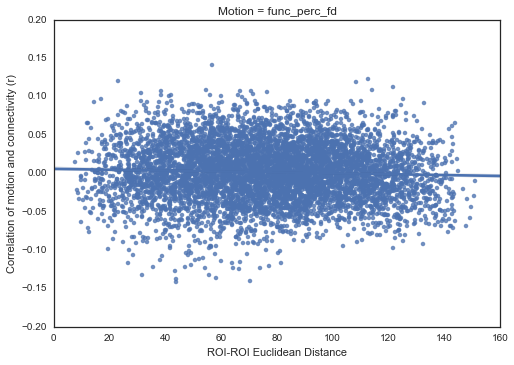

In [144]:
plot=sns.regplot(x,y)
plot.set(xlabel="ROI-ROI Euclidean Distance", ylabel = "Correlation of motion and connectivity (r)")
plot.set_title('Motion = func_perc_fd')
plt.show()

In [145]:
np.corrcoef(x,y)

array([[ 1.        , -0.04509328],
       [-0.04509328,  1.        ]])

# #Stuff below is old and not working

In [13]:
#Then create 116x116 matrix of motion value per subject (in same 3d array)
for i, motion in enumerate(df.loc[:, 'func_mean_fd']):
    motion_mat = pd.DataFrame(motion, index=np.arange(len(corr_mat)), columns=labels)
    if i == 0:
        all_motion_mat = np.zeros([motion_mat.shape[0], motion_mat.shape[1], len(df)])

    all_motion_mat[:, :, i] = motion_mat


In [14]:
#all_motion_mat.shape[0]
#all_motion_mat.shape[1]
all_motion_mat.shape

(116, 116, 798)

In [44]:
a =range(0,798)
all_motion=[]
for i, val in enumerate(a):
    mini_motion=all_motion_mat[:,:,i]
    inds = np.triu_indices_from(mini_motion, k=1)
    motion = mini_motion[inds]
    all_motion=np.append(all_motion, motion)

In [45]:
a =range(0,798)
all_roi=[]
for i, val in enumerate(a):
    mini_roi=all_corr_mat[:,:,i]
    inds2 = np.triu_indices_from(mini_roi, k=1)
    roi = mini_roi[inds2]
    all_roi=np.append(all_roi, roi)

In [46]:
all_roi.shape

(5322660,)

In [43]:
all_motion.shape
#6670*798=5322660

(5322660,)

In [47]:
all_corr_mat.shape

(116, 116, 798)